In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report




In [3]:
data=pd.read_csv('C:/Users/gagan/OneDrive/Desktop/Machine Learinig/AusDataForRainPred.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [6]:
def fill_null(data, Threshold):
    null_count = data.isnull().sum()
    col= data.columns
    count= len(data)
    null_col=[i for i in col if null_count[i]>0]
    for i in null_col:
        null_count = data[i].isnull().sum()
        if (null_count/count)*100 > Threshold:
            data.drop(i,inplace=True,axis=1)        
        else:
            if data[i].dtypes =='float64' or    data[i].dtypes =='int64' :
                data[i].fillna(data[i].mean(), inplace =True)
            elif data[i].dtypes =='object':
                data[i].fillna(data[i].mode()[0], inplace =True)

    return data
        

In [7]:
df=fill_null(data,30)

In [8]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [9]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64

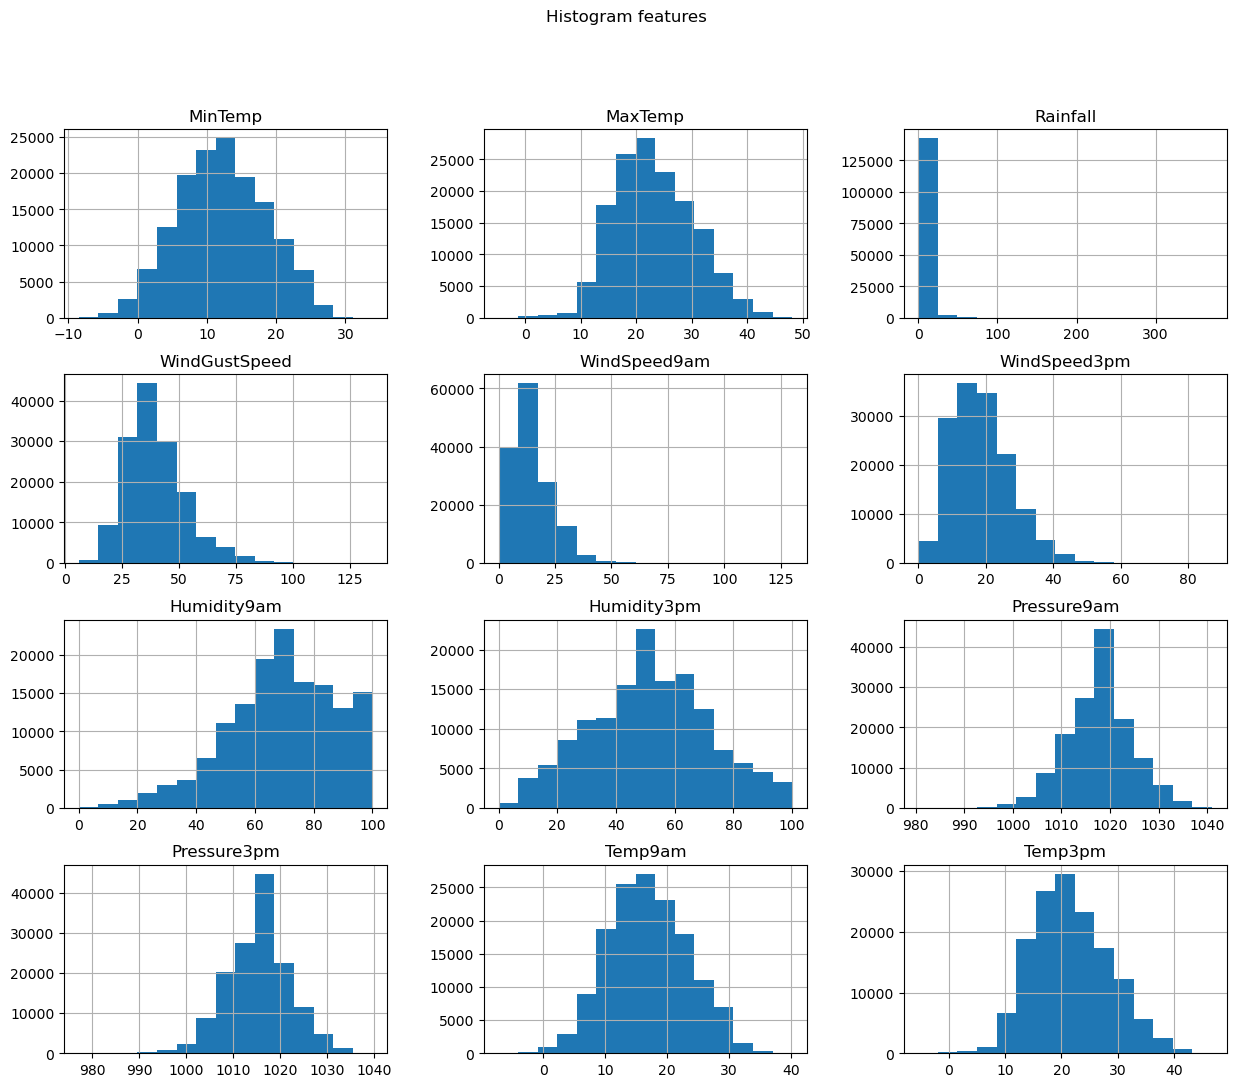

In [10]:
data.hist(bins=15,figsize=(15,12))
plt.suptitle("Histogram features")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

encode= LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = encode.fit_transform(df[i])
        

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [15]:
x=df.drop('RainTomorrow', axis=1)
y=df['RainTomorrow']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

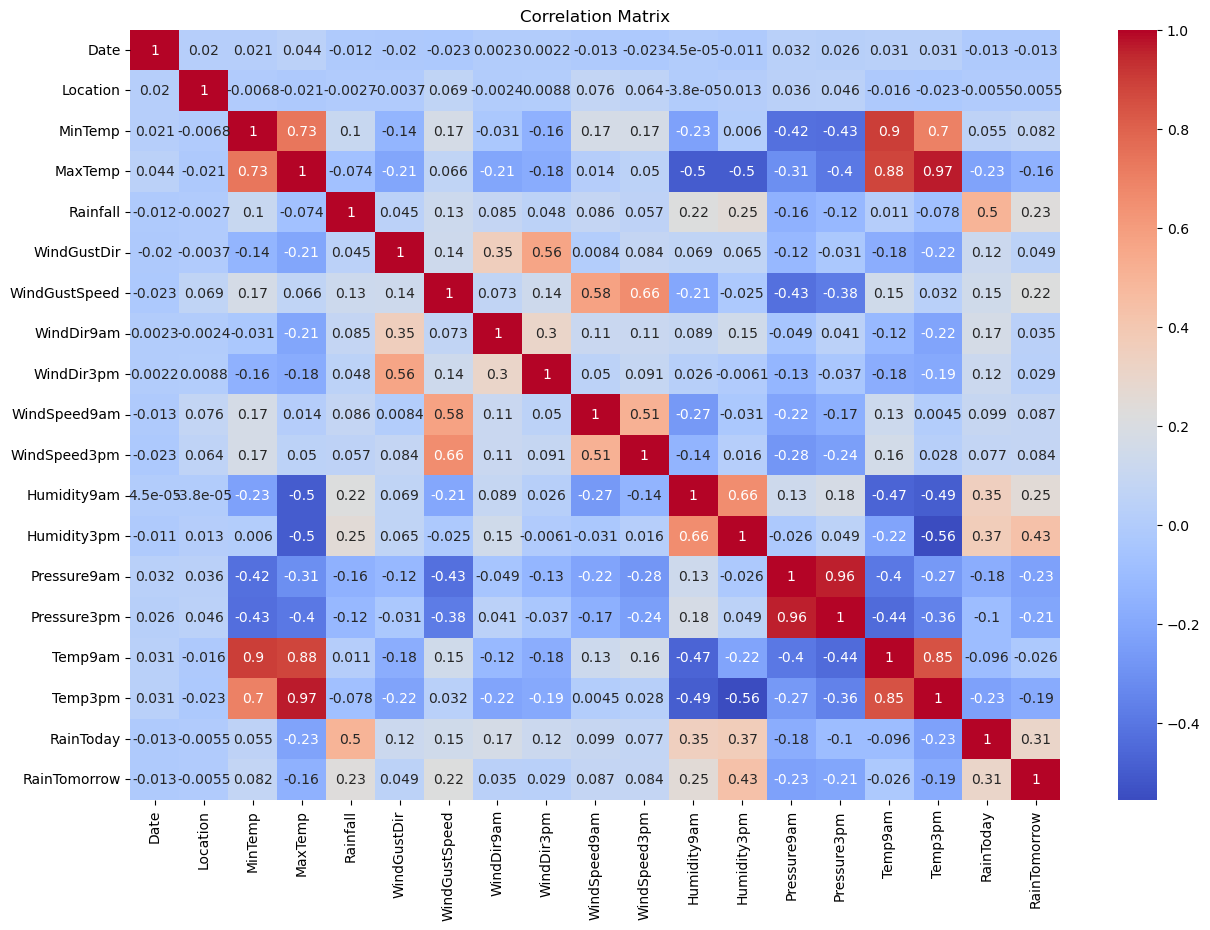

In [18]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42,oob_score=True)
model.fit(X_train_resampled, y_train_resampled )

RandomForestClassifier(oob_score=True, random_state=42)

In [20]:
y_pred=model.predict(x_test)

In [21]:
print(f'oob score:{model.oob_score_:.2f}')

oob score:0.90


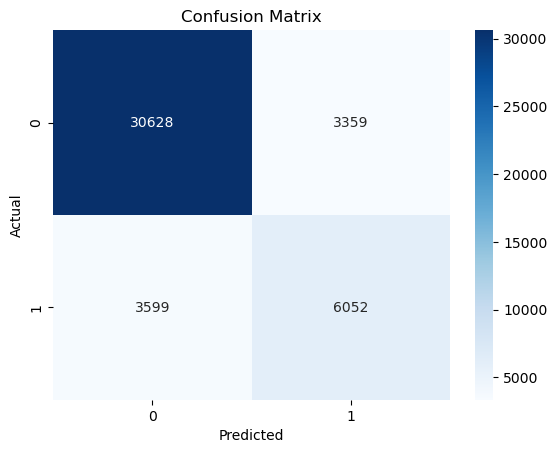

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.64
Recall: 0.63
F1 Score: 0.63


In [24]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [25]:
pickle.load(open('model.pkl','rb'))

RandomForestClassifier(oob_score=True, random_state=42)